In [7]:
from skimage import io,filters,feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np
img=cv2.imread('Images/tiger.jpg',0)

# Edge Detection

In [16]:
from skimage.filters import roberts,sobel,scharr,prewitt,farid
robert_img=roberts(img)
sobel_img=sobel(img)
scharr_img=scharr(img)
prewitt_img=prewitt(img)
farid_img=farid(img)


In [18]:
cv2.imshow("Roberts",robert_img)
cv2.imshow("sobel",sobel_img)
cv2.imshow("Prewitt",prewitt_img)
cv2.imshow("Farid",farid_img)
cv2.imshow("Scherr",scharr_img)
cv2.waitKey(0)
cv2.destroyAllWindows()



# Canny

In [19]:
canny_edge=cv2.Canny(img,50,80)


sigma=0.3
median=np.median(img)
lower=int(max(0,(1.0-sigma)*median))
upper=int(min(255,(1.0+sigma)*median))
auto_canny=cv2.Canny(img,lower,upper)
cv2.imshow("Canny",canny_edge)
cv2.imshow("Auto Canny",auto_canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Image Works using Fourier Transform

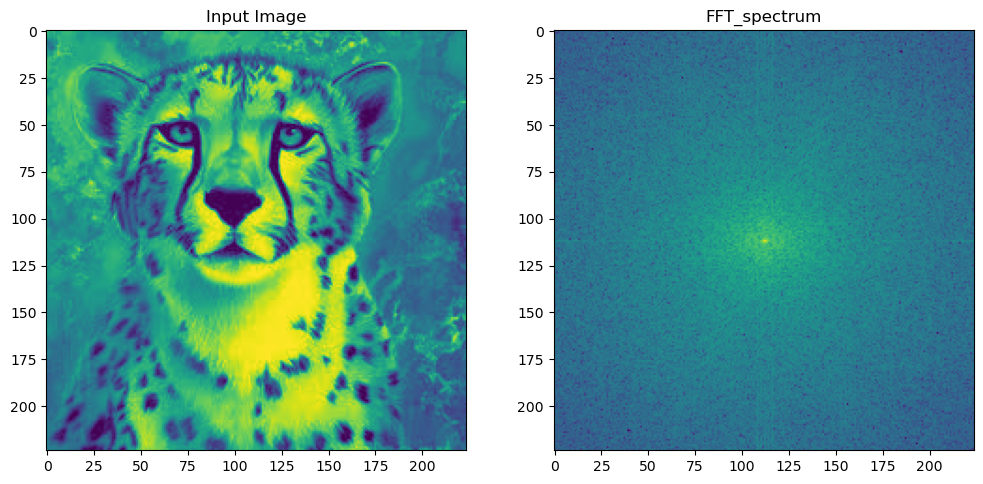

In [23]:
x=np.arange(256)
y=np.sin(2*np.pi*x/3)
y+=max(y)

#Generate 256*256 image
#img=np.array([[y[j]*127 for range(256)] for i in range(256)], dtype=np.unit8)

img = np.array([[y[j]*127 for j in range(256)] for i in range(256)], dtype=np.uint8) 
img=cv2.imread('img1.jpeg',0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log((cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 
1]))+1)

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text("Input Image")
ax2=fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text("FFT_spectrum")
plt.show()

# Image Works using Fourier Transform Filter:

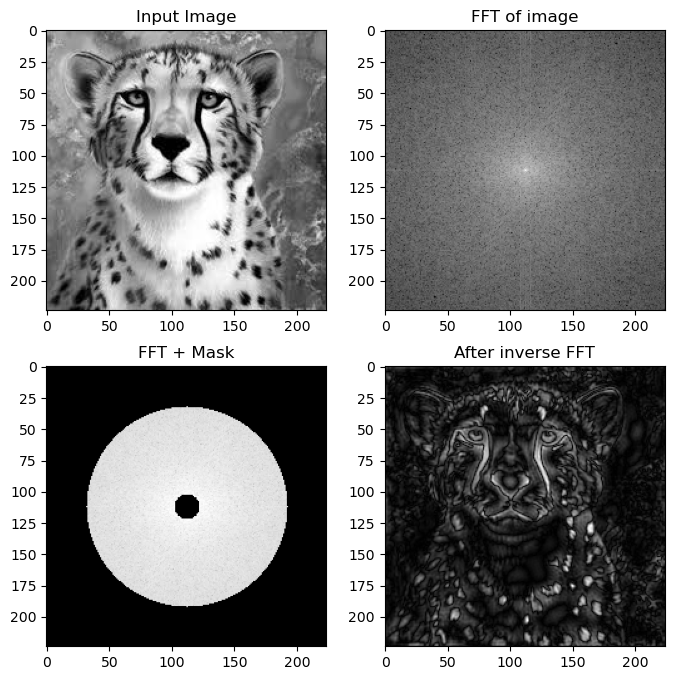

In [2]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from scipy.fft import fftshift
img = cv2.imread("img1.jpeg", 0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))


#Circular LPF mask, center circle is 1, remaining all zeros
rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)
mask=np.ones((rows,cols,2),np.uint8)
r=80
center=[crow,ccol]
x,y=np.ogrid[:rows,:cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1



# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are one
rows,cols=img.shape
crow,ccol=int(rows/2),int(cols/2)
mask=np.zeros((rows,cols,2),np.uint8)
r_out=80
r_in=10
center=[crow,ccol]
x,y=np.ogrid[:rows,:cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
 ((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8 



#fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])


fig = plt.figure(figsize=(8,8))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()

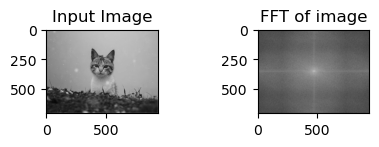

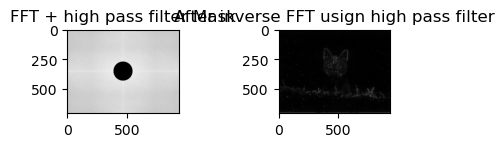

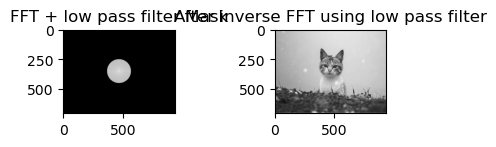

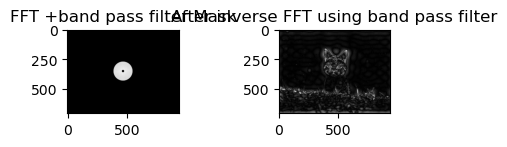

In [17]:
img = cv2.imread('cat.jpeg', 0)
dft = cv2.dft(np.float32(img), flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)
magnitude_spectrum = 20 * np.log(cv2.magnitude(dft_shift[:, :, 0], dft_shift[:, :, 1]))
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(4,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(4,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
# Circular HPF mask, center circle is 0, remaining all ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 0
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(5,5))
ax3 = fig.add_subplot(4,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + high pass filter Mask')
ax4 = fig.add_subplot(4,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT usign high pass filter')
plt.show()
# Circular LPF mask, center circle is 1, remaining all zeros
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r = 100
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) ** 2 + (y - center[1]) ** 2 <= r*r
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])
fig = plt.figure(figsize=(5,5))
ax3 = fig.add_subplot(4,2,5)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + low pass filter Mask')
ax4 = fig.add_subplot(4,2,6)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using low pass filter')
plt.show()
# Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)
mask = np.zeros((rows, cols, 2), np.uint8)
r_out = 80
r_in = 10
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = np.logical_and(((x - center[0]) ** 2 + (y - center[1]) ** 2 >= r_in ** 2),
((x - center[0]) ** 2 + (y - center[1]) ** 2 <= r_out ** 2))
mask[mask_area] = 1
fshift = dft_shift * mask
epsilon = 1e-8
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]) + epsilon)
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])

fig = plt.figure(figsize=(5,5))
ax3 = fig.add_subplot(4,2,7)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT +band pass filter Mask')
ax4 = fig.add_subplot(4,2,8)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT using band pass filter')
plt.show()